1985-02-15T03:11:26.2 1984-09-21T23:22:32.4 1984-09-21T23:22:32.4 1985-07-02T06:03:42.6
Guessing these parameters:  {'amplitude': 54.033703, 'mean': 7.563703790214764, 'stddev': 8.002304471155261}
[[ 2.72644806e+00 -6.76808503e-18 -5.27878832e-02]
 [-6.76808503e-18  3.06614380e-03  7.20622650e-20]
 [-5.27878832e-02  7.20622650e-20  3.06614380e-03]]


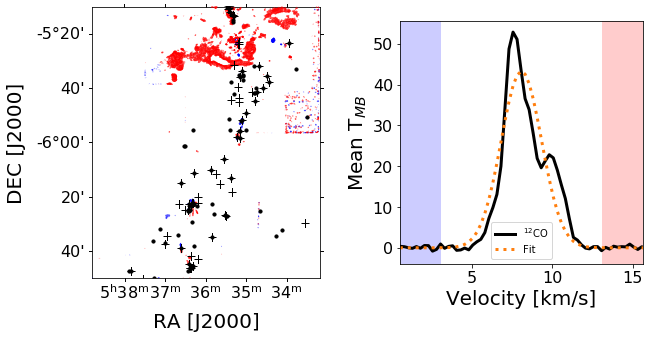

In [11]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, "..")
from stamp import *
from physics import *
matplotlib.style.use("presentation")
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")

t_hops = Table.read("../../catalogs/hops.fits")
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")
c13_regrid = SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb_regrid12co.fits")
c13 = SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb.fits")
c18 = SpectralCube.read("../../cubes/mask_imfit_c18o_pix_2_Tmb.fits")
print(c12.header['DATE-OBS'], c13.header['DATE-OBS'], SpectralCube.read("../../cubes/mask_imfit_13co_pix_2_Tmb.fits").header['DATE-OBS'], SpectralCube.read("../../cubes/mask_imfit_c18o_pix_2_Tmb.fits").header['DATE-OBS'])
sig12, sig13 = 0.86*u.K, 0.64*u.K

# hops_169 = t_hops[t_hops["HOPS"] == 169][0]
# coord_169 = SkyCoord(hops_169["RAJ2000"], hops_169["DEJ2000"], unit=u.deg)
# print(coord_169)
# hops_160 = t_hops[t_hops["HOPS"] == 160][0]
# coord_160 = SkyCoord(hops_160["RAJ2000"], hops_160["DEJ2000"], unit=u.deg)
coord = SkyCoord(84*u.deg, -6*u.deg)

do_fit = 1
nsigma_vel = 4.
blue_vel = 4.7*u.km/u.s
red_vel = 10*u.km/u.s
fit_radius = 15*u.arcsec
heigh=5*u.deg
width=2*u.deg
# width = height = 100*u.arcmin
start = 10.
stop = 50.
step = 5.
fig = plt.figure(figsize=(10,5))
plot_finder(c12, coord=coord,
            fit_cube=c12, fit_radius=fit_radius,
            nsigma_vel=nsigma_vel, blue_vel=blue_vel, red_vel=red_vel,
            fit_spectrum=do_fit, channel_sigma=sig12,
            region_width=width, region_height=height,
            blue_levels=np.arange(start, stop+step, step), red_levels=np.arange(start, stop+step, step),
            show_stamp=True, show_catalogs=True, show_spectrum=True, show_fit=do_fit,
            show_fitcircle=False, show_vrange=True, interactive=False, show_name=False,
            show_contour=1, show_redblue=0, show_outflows=False, redblue_mode='subtract',
            imshow_kwargs={"cmap":"RdBu_r", "interpolation":"none"},
            blue_contour_kwargs={'colors':'blue', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            red_contour_kwargs={'colors':'red', 'linewidths':1, 'alpha':0.6, 'zorder':3},
            fig=fig, savefig=False, verbose=False, autoguess=True,
            spec_label=r'$^{12}$CO'
            )
plt.show()